In [5]:
import sys, time
import numpy as np
sys.path.append('/hosthome/tango/tangostationcontrol/tangostationcontrol')
from toolkit.archiver import *
from matplotlib import pyplot as plt

In [7]:
# Apply the chosen JSON configuration file in directory toolkit/archiver_config/
# RECV is set on PRODUCTION mode to test the archiving of all its attributes
archiver = Archiver(selector_filename='lofar2.json')

Attribute stat/recv/1/version_r not found in archiving list!
Attribute stat/recv/1/opcua_missing_attributes_r not found in archiving list!
Attribute stat/recv/1/ant_status_r not found in archiving list!
Attribute stat/recv/1/rcu_led_colour_r not found in archiving list!
Attribute stat/recv/1/ant_mask_rw not found in archiving list!
Attribute stat/recv/1/hbat_bf_delays_r not found in archiving list!
Attribute stat/recv/1/hbat_bf_delays_rw not found in archiving list!
Attribute stat/recv/1/hbat_led_on_r not found in archiving list!
Attribute stat/recv/1/hbat_led_on_rw not found in archiving list!
Attribute stat/recv/1/hbat_pwr_lna_on_r not found in archiving list!
Attribute stat/recv/1/hbat_pwr_lna_on_rw not found in archiving list!
Attribute stat/recv/1/hbat_pwr_on_r not found in archiving list!
Attribute stat/recv/1/hbat_pwr_on_rw not found in archiving list!
Attribute stat/recv/1/rcu_adc_locked_r not found in archiving list!
Attribute stat/recv/1/rcu_attenuator_db_r not found in archi

In [9]:
# Print the configuration file (as a dictionary)
selector = archiver.selector
print(selector.filename)
env_dict = selector.get_dict()
env_dict

lofar2.json


{'global_variables': {'development_polling_time': '10000',
  'development_archive_time': '60000'},
 'devices': {'STAT/RECV/1': {'environment': 'development',
   'include': [],
   'exclude': ['CLK_Enable_PWR_R',
    'CLK_I2C_STATUS_R',
    'CLK_PLL_error_R',
    'CLK_PLL_locked_R',
    'CLK_translator_busy_R']},
  'STAT/SDP/1': {'environment': 'development',
   'include': [],
   'exclude': ['FPGA_scrap_R', 'FPGA_scrap_RW']},
  'STAT/SST/1': {'environment': 'development', 'include': [], 'exclude': []},
  'STAT/XST/1': {'environment': 'development', 'include': [], 'exclude': []},
  'STAT/UNB2/1': {'environment': 'development', 'include': [], 'exclude': []}}}

In [10]:
device_name = 'STAT/RECV/1'
d=DeviceProxy(device_name) 
state = str(d.state())
print(state)

OFF


In [11]:
# Start the device
if state == "OFF":
    time.sleep(1)
    d.initialise()
    time.sleep(1)
state = str(d.state())
if state == "STANDBY":
    d.set_defaults()
    d.on()
state = str(d.state())
if state == "ON":
    print("Device is now in ON state")

Device is now in ON state


In [13]:
# Add RECV attributes to perform load test
archiver.add_attributes_by_device(device_name,global_archive_period=5000)

Attribute stat/recv/1/version_r will not be archived because polling is set to FALSE!
Attribute stat/recv/1/opcua_missing_attributes_r will not be archived because polling is set to FALSE!
Attribute stat/recv/1/ant_status_r will not be archived because polling is set to FALSE!
Attribute stat/recv/1/rcu_led_colour_r will not be archived because polling is set to FALSE!
Attribute stat/recv/1/hbat_bf_delays_r will not be archived because polling is set to FALSE!
Attribute stat/recv/1/hbat_bf_delays_rw will not be archived because polling is set to FALSE!
Attribute stat/recv/1/hbat_led_on_r will not be archived because polling is set to FALSE!
Attribute stat/recv/1/hbat_led_on_rw will not be archived because polling is set to FALSE!
Attribute stat/recv/1/hbat_pwr_lna_on_r will not be archived because polling is set to FALSE!
Attribute stat/recv/1/hbat_pwr_lna_on_rw will not be archived because polling is set to FALSE!
Attribute stat/recv/1/hbat_pwr_on_r will not be archived because polling

In [14]:
# Print the attributes currently managed by the event subscriber
attrs = archiver.get_subscriber_attributes()
attrs

['tango://databaseds:10000/stat/recv/1/ant_mask_rw',
 'tango://databaseds:10000/stat/recv/1/rcu_mask_rw',
 'tango://databaseds:10000/stat/recv/1/state',
 'tango://databaseds:10000/stat/recv/1/status']

In [15]:
# Print the errors for each attribute
err_dict = archiver.get_subscriber_errors()
err_dict

{'tango://databaseds:10000/stat/recv/1/status': 'Storing Error: mysql_stmt_bind_param() failed, err=Buffer type is not supported'}

In [16]:
# Print the attribute periods
def print_periods(attrs):
    print("{:<45} {:<15} {:<15}".format('Attribute','Poll Period','Archive Period'))
    print("----------")
    for a in attrs:
        ap = AttributeProxy(a)
        att_fqname = ap.get_device_proxy().name()+'/'+ap.name()
        print("{:<45} {:<15} {:<15}".format(att_fqname,ap.get_poll_period(),ap.get_property('archive_period')['archive_period'][0],sep='\t'))

attrs = archiver.get_subscriber_attributes()
print_periods(attrs)

Attribute                                     Poll Period     Archive Period 
----------
STAT/RECV/1/ant_mask_rw                       1000            5000           
STAT/RECV/1/rcu_mask_rw                       1000            5000           
STAT/RECV/1/state                             1000            5000           
STAT/RECV/1/status                            1000            5000           


In [17]:
# Turn off the device
d.off()

In [20]:
# Initialise the retriever object and print the archived attributes in the database
retriever = Retriever()
retriever.get_all_archived_attributes()

[<Attribute(fullname='tango://databaseds:10000/stat/recv/1/ant_mask_rw',data_type ='4',ttl='0',facility ='tango://databaseds:10000',domain ='stat',family ='recv',member ='1',name ='ant_mask_rw')>,
 <Attribute(fullname='tango://databaseds:10000/stat/recv/1/rcu_mask_rw',data_type ='4',ttl='0',facility ='tango://databaseds:10000',domain ='stat',family ='recv',member ='1',name ='rcu_mask_rw')>,
 <Attribute(fullname='tango://databaseds:10000/stat/recv/1/state',data_type ='45',ttl='0',facility ='tango://databaseds:10000',domain ='stat',family ='recv',member ='1',name ='state')>,
 <Attribute(fullname='tango://databaseds:10000/stat/recv/1/status',data_type ='41',ttl='0',facility ='tango://databaseds:10000',domain ='stat',family ='recv',member ='1',name ='status')>]

In [18]:
# Attribute chosen to be retrieved
attr_name = 'rcu_mask_rw'
attr_fq_name = str(device_name+'/'+attr_name).lower()
attr_fq_name

'stat/recv/1/rcu_mask_rw'

In [21]:
# Retrieve records in the last n hours (works even with decimals)

# Use alternatively one of the following two methods to retrieve data (last n hours or interval)
records= retriever.get_attribute_value_by_hours(attr_fq_name,hours=0.1)
#records = retriever.get_attribute_value_by_interval(attr_fq_name,'2021-09-01 16:00:00', '2021-09-01 16:03:00')

if not records:
    print('Empty result!')
else:
    # Convert DB Array records into Python lists
    data = build_array_from_record(records,records[0].dim_x_r)
    # Extract only the value from the array 
    array_values = get_values_from_record(data)

#records
#data
#array_values

In [22]:
# Extract and process timestamps for plotting purposes
def get_timestamps(data,strformat):
    timestamps = []
    for i in range(len(data)):
        timestamps.append(data[i][0].recv_time.strftime(strformat))
    return timestamps
timestamps = get_timestamps(data,"%Y-%m-%d %X")

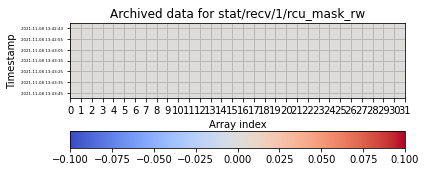

In [23]:
# Plot of array values

heatmap = np.array(array_values,dtype=np.float)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [128, 64]
plt.rcParams['figure.dpi'] = 128
ax = fig.add_subplot(111)
im = ax.imshow(heatmap, interpolation='nearest',cmap='coolwarm')
ax.set_xlabel('Array index')
ax.set_ylabel('Timestamp')
ax.set_xlim([0,(records[0].dim_x_r)-1])
ax.set_xticks(np.arange(0,records[0].dim_x_r))

ax.set_yticks(range(0,len(timestamps)))
ax.set_yticklabels(timestamps,fontsize=4)

# Comment the previous two lines and uncomment the following line if there are too many timestamp labels
#ax.set_yticks(range(0,len(timestamps),10))

ax.set_title('Archived data for '+ attr_fq_name)
ax.grid()
cbar = fig.colorbar(ax=ax, mappable=im, orientation='horizontal')
plt.show()